<a href="https://colab.research.google.com/github/vaishnokumar/status_deep_learning/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

### Data (Preparing & *Loading*)

Create *known* parameters

Linear Regression -> y=mx+c , m =slope/gradient
                              c= intercept

In [2]:
# create known parameters
weight = 0.7 # slope
bias = 0.3 #intercept of y when x = 0

start = 0
end = 1
step = 0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias    # y=mx+c

In [3]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [4]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [5]:
len(X), len(y)

(50, 50)

Split Data into traning and test sets

**training set -> validation set -> testing set**

**Generaliztion - ** Generalization in machine learning refers to the ability of a model to perform well on unseen or new data points that were not part of the training dataset. It's essentially about how well the model can understand the underlying patterns in the data and make accurate predictions or classifications on new, unseen examples.

In [6]:
# create a train/test split

train_split = int(0.8 * len(X))
print(f'this {train_split} amount of data from dataset will be used for training out of {len(X)}')

this 40 amount of data from dataset will be used for training out of 50


In [7]:
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
len(X_train), len(y_train)

(40, 40)

In [9]:
len(X_test), len(y_test)

(10, 10)

In [10]:
def plot_pred(train_data = X_train,
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              pred = None):
  """
  Plots training data,test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

  if pred is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, pred, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

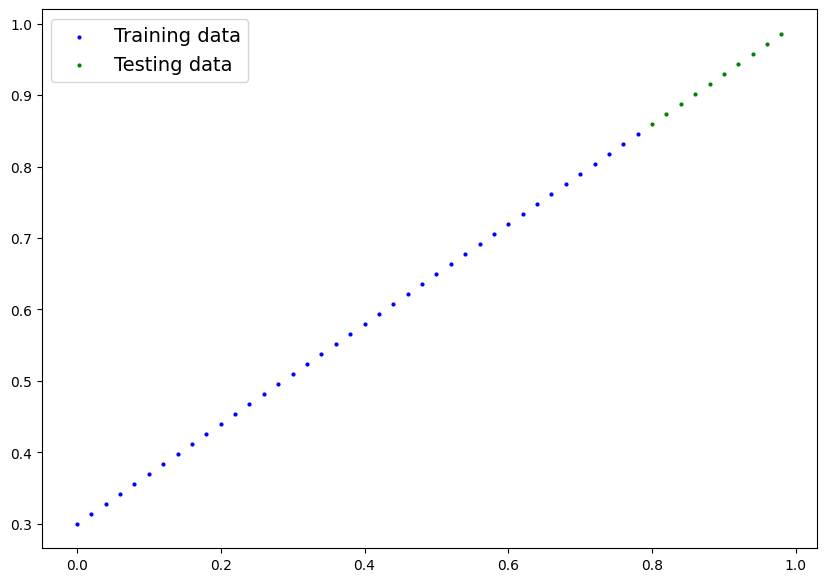

In [11]:
plot_pred()

### **Building Model**

In [12]:
class LinearRegression(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

  def __init__(self):

    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype= float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype= float))

  # Forward defines the computation in the model
  def forward(self,x:torch.Tensor):
    return self.weight * x + self.bias # linear regression


### Pytorch model building essentials
nn.Module contains the larger building blocks (layers)
nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data



In [13]:
# checking the contents of our PyTorch model

# create a random seed

torch.manual_seed(42)

# create a instance of the model

model_0 = LinearRegression()


#checkout the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [14]:
# list named parameters

model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [15]:
weight , bias

(0.7, 0.3)

### Making Prediction using 'torch.inference_model()'

In [16]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [18]:
with torch.inference_mode():  # always do this!!!
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

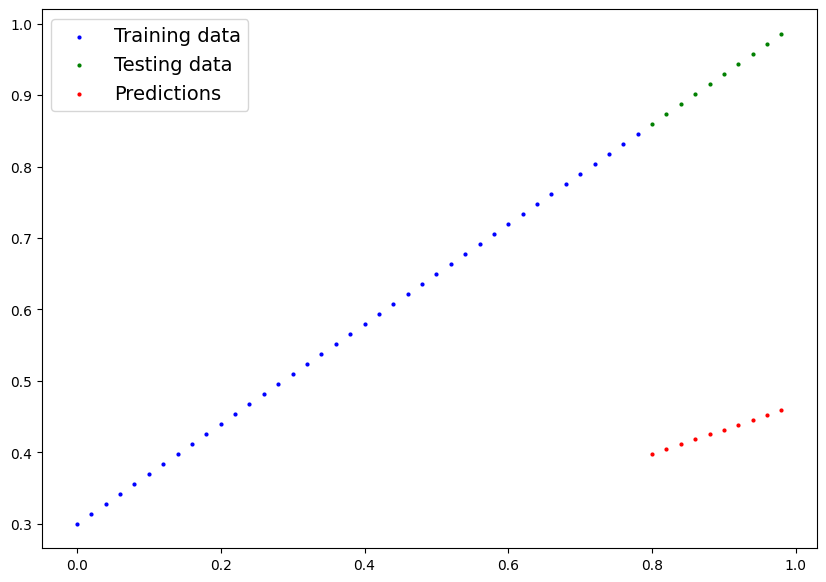

In [19]:
plot_pred(pred = y_preds)

### Train Model

loss funtion - to measure how poor or how wrong your model predicitons are use loss function (lower is better!)

optimizer - after finding loss function we can set optimizer and it will adjusts the model's parameters (e.g. weight and bias)

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [21]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [22]:
# setup loss function

loss_fn = nn.L1Loss()  # this calculate MAE

# setup a optimizer(Stochastic gradient descent)

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.01) # lr is hyperparameter

### Building a training loop and testing loop

In [23]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [24]:
torch.manual_seed(42)

# an epoch is one loop through data.. this is also a hyperparameter coz we've set it ourshelves

epochs = 200

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### training
# 0. loop through the data

for epoch in range(epochs):

  # set the model to training mode
  model_0.train()

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f'Loss: {loss}')

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss w.r.t parameters of the model
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  ### testing
  model_0.eval() #turns off different settings in the model
  with torch.inference_mode(): #turns off gradient tracking
    # 1. do the forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out all the status
  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')

    #print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288135683755547 | Test Loss: 0.4810651841540759
OrderedDict([('weight', tensor([0.3406], dtype=torch.float64)), ('bias', tensor([0.1388], dtype=torch.float64))])
Epoch: 10 | Loss: 0.1976713574739093 | Test Loss: 0.346355184508239
OrderedDict([('weight', tensor([0.3796], dtype=torch.float64)), ('bias', tensor([0.2388], dtype=torch.float64))])
Epoch: 20 | Loss: 0.08908721056311557 | Test Loss: 0.21729648486064157
OrderedDict([('weight', tensor([0.4184], dtype=torch.float64)), ('bias', tensor([0.3333], dtype=torch.float64))])
Epoch: 30 | Loss: 0.05314849742260115 | Test Loss: 0.14464008519991425
OrderedDict([('weight', tensor([0.4512], dtype=torch.float64)), ('bias', tensor([0.3768], dtype=torch.float64))])
Epoch: 40 | Loss: 0.04543793101588776 | Test Loss: 0.11360938544629148
OrderedDict([('weight', tensor([0.4748], dtype=torch.float64)), ('bias', tensor([0.3868], dtype=torch.float64))])
Epoch: 50 | Loss: 0.041678606478126046 | Test Loss: 0.09919938569279392
OrderedD

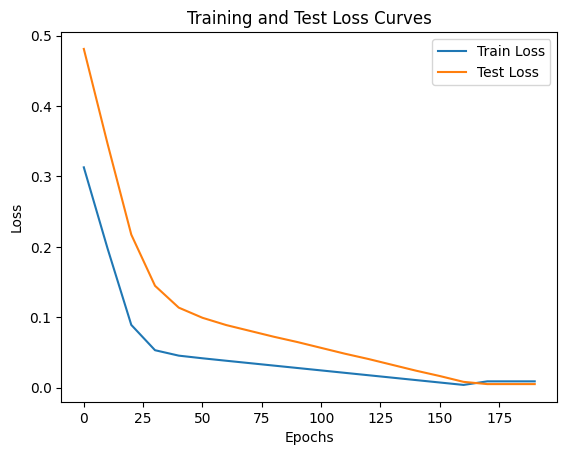

In [25]:
# Plot the loss curves

import numpy as np

num_loss_values = np.array(torch.tensor(loss_values).numpy())

plt.plot(epoch_count, num_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [26]:
# Loss: 0.06395434770137572
# OrderedDict([('weight', tensor([0.4361], dtype=torch.float64)), ('bias', tensor([0.3613], dtype=torch.float64))])

In [27]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [28]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

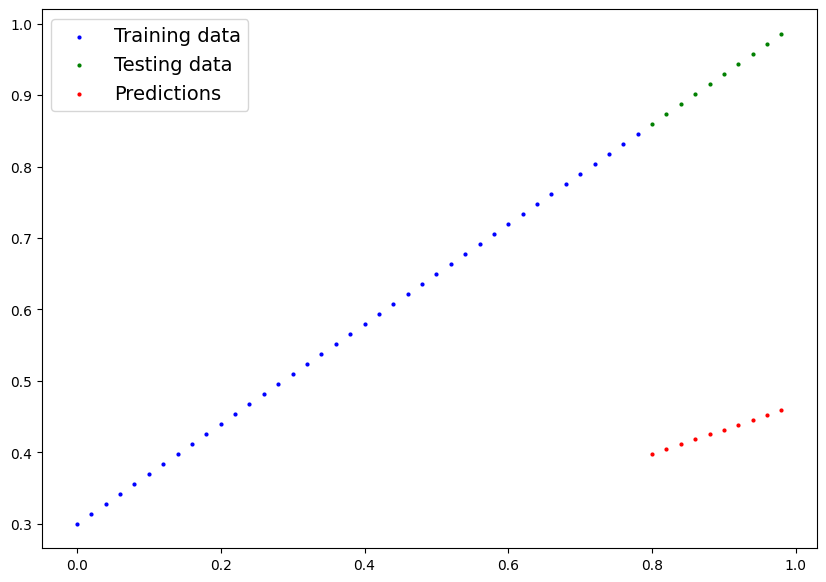

In [29]:
plot_pred(pred = y_preds)

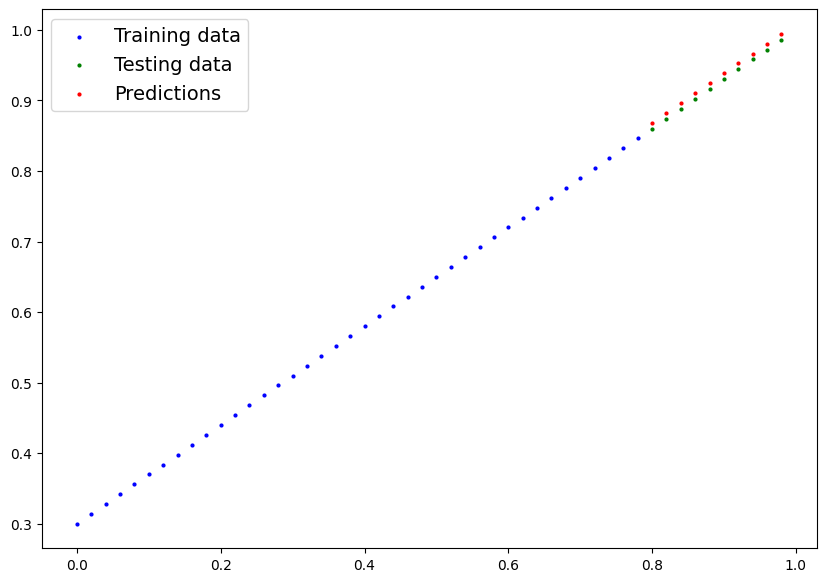

In [30]:
plot_pred(pred = y_preds_new)

### Saving a model in Pytorch

In [31]:
from pathlib import Path


# 1. Create models directory

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok=True)


# 2. create model save path

MODEL_NAME = '01_pytorch_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model
print(f'Saving Model To: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model To: models/01_pytorch_model_0.pth


In [32]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1562 May 26 16:24 01_pytorch_model_0.pth


In [33]:
## Loading the model

#create a new instance

loaded_model_0 = LinearRegression()

#load the saved dict of the model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990], dtype=torch.float64)),
             ('bias', tensor([0.3093], dtype=torch.float64))])

In [35]:
#make some prediction

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_0(X_test)

loaded_model_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [36]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], dtype=torch.float64)

In [37]:
#compare with y_preds of model_0
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting Everything Together

In [38]:
# Importing PyTorch, matplotlib, numpy

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#check version

torch.__version__

'2.3.0+cu121'

Create Device Agnostic Code -> This means if we got GPU it will work on GPU not it in CPU

In [39]:
# setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Current Device: {device}')

Current Device: cuda


### 6.1 Data

In [40]:
# create data using linear reg formual y = mx + c

weight = 0.7 # slope
bias = 0.3 # y-intercept

# create range values

start = 0
end = 1
step = 0.02

#create X and y (features and label)

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [42]:
#split the data

train_split = int(0.8 * len(X)) # 80% of data will be use as training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

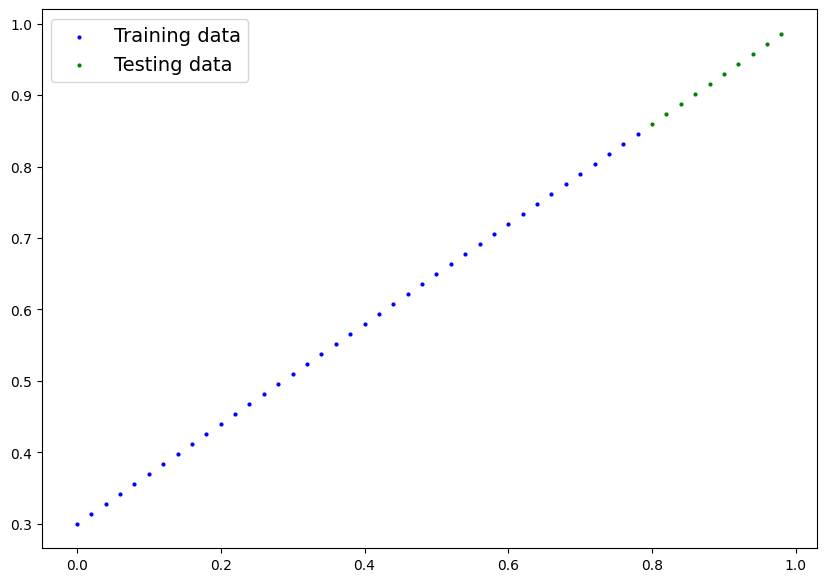

In [43]:
# plot the data

plot_pred()

### 6.2 Building PyTorch Linear Model

In [45]:
#create a liner model by subclassing nn.module

class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for linear parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [46]:
# set the model to use the target device (cuda)
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

loss function,
optimizer,
training loop,
testing loop,

In [49]:
#setup the loss function

loss_fn = nn.L1Loss() #mae

#setup the optimizer

optim = torch.optim.SGD(params = model_1.parameters(),
                        lr = 0.01)

In [52]:
#Setup the training loop

torch.manual_seed(42)

epochs = 200

#put data on gpu/cude (device agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train) #this data will go through linear layer

  # 2. calculate the loss
  loss_val = loss_fn(y_pred, y_train)

  # 3. zero the optim grad
  optim.zero_grad()

  # 4. backpropagation on loss
  loss_val.backward()

  # 5. optim step
  optim.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #print the result

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss_val} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [53]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and Evaluation Prediction

In [55]:
# turn model into eval() mode

model_1.eval()

#make prediction on the test
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

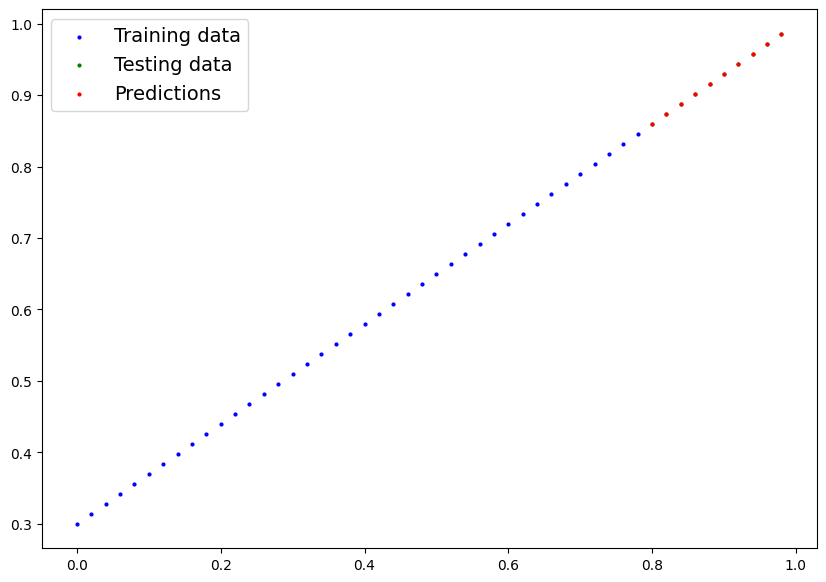

In [57]:
#visual the predictions

plot_pred(pred = y_preds.cpu())

### 6.5 Saving & loading a trained model

In [60]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_model_1.pth


In [61]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [62]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')